In [1]:
from google.colab import drive
drive.mount('/content/gdive')

Mounted at /content/gdive


In [2]:
path = '/content/gdive/MyDrive/Machine Learning Sem3/Tugas 3'

In [7]:
import pandas as pd
df = pd.read_csv(path + '/Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
df1 = (
    df[["cnt", "temp", "atemp", "hum", "windspeed", "weathersit"]]
        .rename(columns={
            "cnt": "jumlah_peminjam",
            "temp": "suhu",
            "atemp": "suhu_dirasakan",
            "hum": "kelembaban",
            "windspeed": "kecepatan_angin",
            "weathersit": "kondisi_cuaca"
        })
        .round({
            "suhu": 2,
            "suhu_dirasakan": 2,
            "kelembaban": 2,
            "kecepatan_angin": 2
        })
).copy()

df1.head()

,jumlah_peminjam,suhu,suhu_dirasakan,kelembaban,kecepatan_angin,kondisi_cuaca
0,985,0.34,0.36,0.81,0.16,2
1,801,0.36,0.35,0.70,0.25,2
2,1349,0.20,0.19,0.44,0.25,1
3,1562,0.20,0.21,0.59,0.16,1
4,1600,0.23,0.23,0.44,0.19,1


In [10]:
corr_matrix = df1.corr()
print(corr_matrix)

                 jumlah_peminjam      suhu  suhu_dirasakan  kelembaban  \
jumlah_peminjam         1.000000  0.627216        0.630491   -0.101558   
suhu                    0.627216  1.000000        0.991407    0.125204   
suhu_dirasakan          0.630491  0.991407        1.000000    0.139541   
kelembaban             -0.101558  0.125204        0.139541    1.000000   
kecepatan_angin        -0.234208 -0.157659       -0.181526   -0.249820   
kondisi_cuaca          -0.297391 -0.121243       -0.120344    0.591873   

                 kecepatan_angin  kondisi_cuaca  
jumlah_peminjam        -0.234208      -0.297391  
suhu                   -0.157659      -0.121243  
suhu_dirasakan         -0.181526      -0.120344  
kelembaban             -0.249820       0.591873  
kecepatan_angin         1.000000       0.037196  
kondisi_cuaca           0.037196       1.000000  


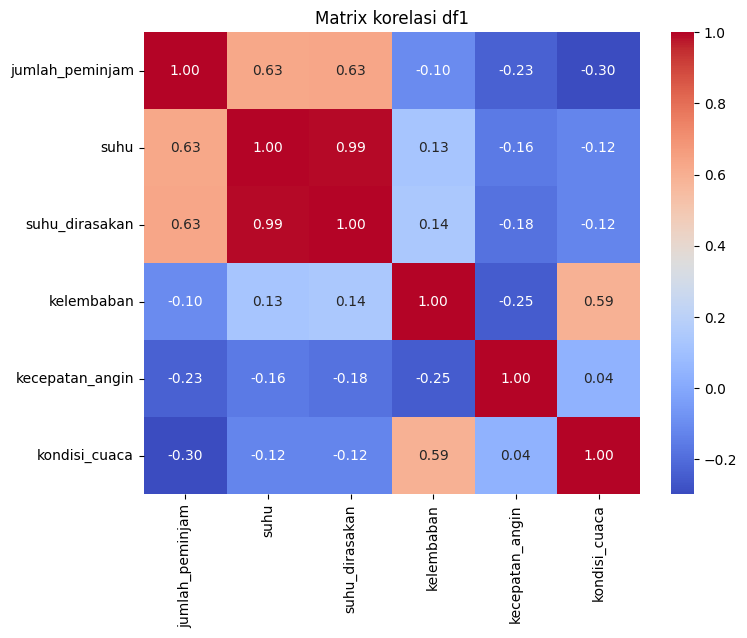

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrix korelasi df1")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
y = df1["jumlah_peminjam"]
X = df1[["suhu_dirasakan", "kondisi_cuaca"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train :", len(X_train))
print("Jumlah data test :", len(X_test))

X_train.head()

Jumlah data train : 584
Jumlah data test : 147


,suhu_dirasakan,kondisi_cuaca
682,0.32,2
250,0.56,3
336,0.31,1
260,0.49,1
543,0.64,1


In [25]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,suhu_dirasakan,kondisi_cuaca
682,1.0,0.32,2
250,1.0,0.56,3
336,1.0,0.31,1
260,1.0,0.49,1
543,1.0,0.64,1


In [27]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_const).fit()

print('--------------------')
print(model.params)
print('--------------------')

const = model.params['const']
x1_suhu = model.params['suhu_dirasakan']
x2_kondisi_cuaca = model.params['kondisi_cuaca']

print(f"y = {const:.3f} + {x1_suhu:.3f}*x1 + {x2_kondisi_cuaca:.3f}*x2")

--------------------
const             2257.748352
suhu_dirasakan    7109.418212
kondisi_cuaca     -783.183974
dtype: float64
--------------------
y = 2257.748 + 7109.418*x1 + -783.184*x2


In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        jumlah_peminjam   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           4.44e-74
Time:                        13:43:52   Log-Likelihood:                -5072.3
No. Observations:                 584   AIC:                         1.015e+04
Df Residuals:                     581   BIC:                         1.016e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2257.7484    253.655      8.

In [30]:
import numpy as np
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "suhu_dirasakan (celcius)": X_test["suhu_dirasakan"].to_numpy(),
    "kondisi_cuaca": X_test["kondisi_cuaca"].to_numpy(),
    "jumlah Aktual (jml)": y_test.to_numpy(),
    "jumlah Prediksi (jml)": y_pred_test
})

hasil["Selisih error (jml)"] = hasil["jumlah Prediksi (jml)"] - hasil["jumlah Aktual (jml)"]
denom = hasil["jumlah Aktual (jml)"].replace(0, np.nan)
hasil ["Akurasi (%)"]= (1 - (hasil ["Selisih error (jml)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,suhu_dirasakan (celcius),kondisi_cuaca,jumlah Aktual (jml),jumlah Prediksi (jml),Selisih error (jml),Akurasi (%)
703,0.47,1,6606,4815.990938,-1790.009062,72.903284
33,0.18,1,1550,2754.259657,1204.259657,22.305829
300,0.32,2,3747,2966.394233,-780.605767,79.167180
456,0.42,2,6041,3677.336054,-2363.663946,60.872969
633,0.54,1,7538,5313.650213,-2224.349787,70.491513
...,...,...,...,...,...,...
70,0.33,1,2132,3820.672388,1688.672388,20.793978
192,0.74,1,4258,6735.533855,2477.533855,41.814611
328,0.38,1,2792,4176.143299,1384.143299,50.424667
165,0.59,1,5180,5669.121124,489.121124,90.557507
